In [2]:
def load_image(self, image_id):
        """Load the specified image and return a [H,W,3] Numpy array.
		Taken from utils.py, any refinements we need can be done here
        """
        # Load image
        image = skimage.io.imread(self.image_info[image_id]['path'])
        # If has an alpha channel, remove it for consistency
        if image.shape[-1] == 4:
            image = image[..., :3]
        # If RGB, convert to grayscale.
        if image.ndim != 1:
            image = skimage.color.rgb2gray(image)
        return image

model.load_weights(weights_path, by_name=True, exclude=[
            "conv1", "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])

model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=40,
                layers='heads')

NameError: ignored

TypeError: ignored

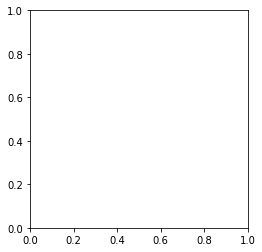

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('nature.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

[[[0.69411765 0.76470588 0.79215686]
  [0.69411765 0.76470588 0.79215686]
  [0.69411765 0.76470588 0.79215686]
  ...
  [0.64313725 0.65098039 0.60392157]
  [0.64705882 0.65490196 0.60784314]
  [0.62745098 0.63529412 0.58823529]]

 [[0.74117647 0.81176471 0.83921569]
  [0.7372549  0.80784314 0.83529412]
  [0.73333333 0.80392157 0.83137255]
  ...
  [0.67058824 0.6745098  0.63529412]
  [0.66666667 0.68235294 0.63529412]
  [0.69019608 0.69411765 0.65490196]]

 [[0.78431373 0.85490196 0.88235294]
  [0.78039216 0.85098039 0.87843137]
  [0.76862745 0.83921569 0.86666667]
  ...
  [0.72941176 0.74117647 0.70588235]
  [0.72156863 0.74509804 0.70196078]
  [0.7254902  0.7372549  0.70196078]]

 ...

 [[0.08235294 0.29019608 0.34117647]
  [0.04313725 0.25098039 0.30196078]
  [0.02745098 0.23137255 0.28235294]
  ...
  [0.25490196 0.5254902  0.5372549 ]
  [0.02352941 0.31372549 0.32156863]
  [0.14509804 0.43529412 0.44313725]]

 [[0.12156863 0.30588235 0.36078431]
  [0.05882353 0.24313725 0.29803922]


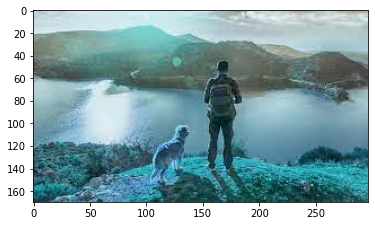

In [6]:
import cv2
import numpy as np
img=cv2.imread('nature.jpg')
im=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
data=np.array(img/255)
print(data)
import matplotlib.pyplot as plt
plt.imshow(data)
plt.show()

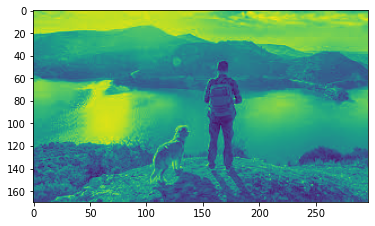

In [10]:
i = np.sum(data/3,axis=2)
plt.imshow(i)
plt.show()

In [12]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

In [13]:
im = plt.imread("nature.jpg")

im.shape

(170, 297, 3)

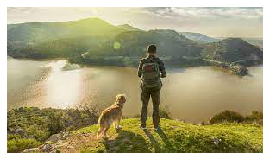

In [14]:
def plti(im, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')

plti(im)

In [35]:
from PIL import Image

#read the image
im = Image.open("nature.jpg")

#rotate image
angle = 45
out = im.rotate(angle)
out.save('rotate-output.jpg')

[[[0.69411765 0.76470588 0.79215686]
  [0.69411765 0.76470588 0.79215686]
  [0.69411765 0.76470588 0.79215686]
  ...
  [0.64313725 0.65098039 0.60392157]
  [0.64705882 0.65490196 0.60784314]
  [0.62745098 0.63529412 0.58823529]]

 [[0.74117647 0.81176471 0.83921569]
  [0.7372549  0.80784314 0.83529412]
  [0.73333333 0.80392157 0.83137255]
  ...
  [0.67058824 0.6745098  0.63529412]
  [0.66666667 0.68235294 0.63529412]
  [0.69019608 0.69411765 0.65490196]]

 [[0.78431373 0.85490196 0.88235294]
  [0.78039216 0.85098039 0.87843137]
  [0.76862745 0.83921569 0.86666667]
  ...
  [0.72941176 0.74117647 0.70588235]
  [0.72156863 0.74509804 0.70196078]
  [0.7254902  0.7372549  0.70196078]]

 ...

 [[0.08235294 0.29019608 0.34117647]
  [0.04313725 0.25098039 0.30196078]
  [0.02745098 0.23137255 0.28235294]
  ...
  [0.25490196 0.5254902  0.5372549 ]
  [0.02352941 0.31372549 0.32156863]
  [0.14509804 0.43529412 0.44313725]]

 [[0.12156863 0.30588235 0.36078431]
  [0.05882353 0.24313725 0.29803922]


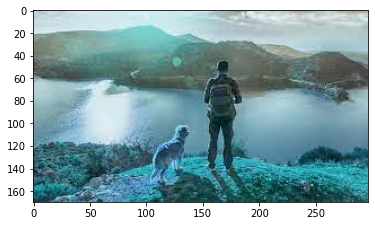

In [39]:
import cv2
import numpy as np
img=cv2.imread('nature.jpg')
im=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
data=np.array(img/255)
print(data)
angle = 45

import matplotlib.pyplot as plt
plt.imshow(data)
plt.show()

In [41]:
from PIL import Image

#read the image
im = Image.open("nature.jpg")

#rotate image
angle = 45
out = im.rotate(angle, expand=True)
out.save('rotate-output.jpg')


In [50]:
# Assuming the image has channels as the last dimension.
# filter.shape -> (kernel_size, kernel_size, channels)
# image.shape -> (width, height, channels)
def convolve(image, filter, padding = (1, 1)):
    # For this to work neatly, filter and image should have the same number of channels
    # Alternatively, filter could have just 1 channel or 2 dimensions
    
    if(image.ndim == 2):
        image = np.expand_dims(image, axis=-1) # Convert 2D grayscale images to 3D
    if(filter.ndim == 2):
        filter = np.repeat(np.expand_dims(filter, axis=-1), image.shape[-1], axis=-1) # Same with filters
    if(filter.shape[-1] == 1):
        filter = np.repeat(filter, image.shape[-1], axis=-1) # Give filter the same channel count as the image
    
    #print(filter.shape, image.shape)
    assert image.shape[-1] == filter.shape[-1]
    size_x, size_y = filter.shape[:2]
    width, height = image.shape[:2]
    
    output_array = np.zeros(((width - size_x + 2*padding[0]) + 1, 
                             (height - size_y + 2*padding[1]) + 1,
                             image.shape[-1])) # Convolution Output: [(W−K+2P)/S]+1
    
    padded_image = np.pad(image, [
        (padding[0], padding[0]),
        (padding[1], padding[1]),
        (0, 0)
    ])
    
    for x in range(padded_image.shape[0] - size_x + 1): # -size_x + 1 is to keep the window within the bounds of the image
        for y in range(padded_image.shape[1] - size_y + 1):

            # Creates the window with the same size as the filter
            window = padded_image[x:x + size_x, y:y + size_y]

            # Sums over the product of the filter and the window
            output_values = np.sum(filter * window, axis=(0, 1)) 

            # Places the calculated value into the output_array
            output_array[x, y] = output_values
            
    return output_array

In [51]:
filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
], dtype=np.float32)/9.0 # Box Filter

image = Image.open('nature.jpg')
image_arr = np.array(image)/255.0

convolved_arr = convolve(image_arr, filter, padding=(1, 1))
convolved = Image.fromarray(np.uint8(255 * convolved_arr), 'RGB') # Convolved Image


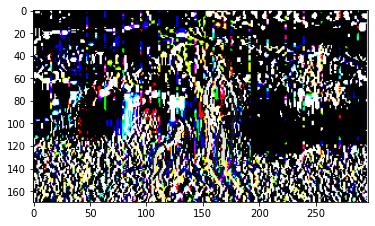

In [54]:
import matplotlib.pyplot as plt
plt.imshow(convolved)
plt.show()

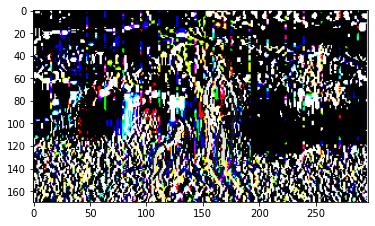

In [56]:
# Assuming the image has channels as the last dimension.
# filter.shape -> (kernel_size, kernel_size, channels)
# image.shape -> (width, height, channels)
def convolve(image, filter, padding = (1, 1)):
    # For this to work neatly, filter and image should have the same number of channels
    # Alternatively, filter could have just 1 channel or 2 dimensions
    
    if(image.ndim == 2):
        image = np.expand_dims(image, axis=-1) # Convert 2D grayscale images to 3D
    if(filter.ndim == 2):
        filter = np.repeat(np.expand_dims(filter, axis=-1), image.shape[-1], axis=-1) # Same with filters
    if(filter.shape[-1] == 1):
        filter = np.repeat(filter, image.shape[-1], axis=-1) # Give filter the same channel count as the image
    
    #print(filter.shape, image.shape)
    assert image.shape[-1] == filter.shape[-1]
    size_x, size_y = filter.shape[:2]
    width, height = image.shape[:2]
    
    output_array = np.zeros(((width - size_x + 2*padding[0]) + 1, 
                             (height - size_y + 2*padding[1]) + 1,
                             image.shape[-1])) # Convolution Output: [(W−K+2P)/S]+1
    
    padded_image = np.pad(image, [
        (padding[0], padding[0]),
        (padding[1], padding[1]),
        (0, 0)
    ])
    
    for x in range(padded_image.shape[0] - size_x + 1): # -size_x + 1 is to keep the window within the bounds of the image
        for y in range(padded_image.shape[1] - size_y + 1):

            # Creates the window with the same size as the filter
            window = padded_image[x:x + size_x, y:y + size_y]

            # Sums over the product of the filter and the window
            output_values = np.sum(filter * window, axis=(0, 1)) 

            # Places the calculated value into the output_array
            output_array[x, y] = output_values
            
    return output_array
    filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32)/9.0 # Box Filter

image = Image.open('nature.jpg')
image_arr = np.array(image)/255.0

convolved_arr = convolve(image_arr, filter, padding=(1, 1))
convolved = Image.fromarray(np.uint8(255 * convolved_arr), 'RGB') # Convolved Image
import matplotlib.pyplot as plt
plt.imshow(convolved)
plt.show()
